# Import Libraries

In [85]:
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.model_selection import train_test_split
from plotnine import *

# Load Data

In [131]:
# Load market data
df = pd.read_csv('market_2025-04-05.csv')

In [121]:
# Values for the truck we are trying to predict
df_truck = pd.DataFrame({
    "truck": [1],
    "truck_model": ["f350"],
    "truck_mileage": [15000],
    "truck_year": [2020],
    "trim": ["lariat"],
    "cab": ["crew"],
    "camper": [1],
    "camper_model": ["grandby"],
    "camper_flatbed": [1],
    "camper_year": [2020],
    "camper_year_imputed": [0],
    "sale": [0],
    "asking": [0],
    "note": ["none"]
})

# Model Selection/EDA

In [143]:
# train/test split
train_df, test_df = train_test_split(df_data, test_size=0.2, random_state=5)

In [156]:
train_df.tail()

,truck,truck_model,truck_mileage,truck_year,trim,cab,camper,camper_model,camper_flatbed,camper_year,camper_year_imputed,sale,asking,platform,train,Note
70,1,f350,33000,2020,lariat,crew,0,none,0,0,0,0,52902,bluebook,1,none
45,0,none,0,0,none,none,1,fleet,0,2024,0,0,32548,facebook,1,none
19,0,none,0,0,none,none,1,fleet,0,2020,0,1,19000,main_line_overland,1,reduced from 23000
38,0,none,0,0,none,none,1,hawk,0,2017,0,0,18000,facebook,1,none
46,1,f150,37000,2023,xlt,crew,1,project_m,0,2023,1,0,51000,facebook,1,year imputed


In [146]:
train_df.columns

Index(['truck', 'truck_model', 'truck_mileage', 'truck_year', 'trim', 'cab',
       'camper', 'camper_model', 'camper_flatbed', 'camper_year',
       'camper_year_imputed', 'sale', 'asking', 'platform', 'train', 'Note'],
      dtype='object')

In [147]:
# Simple additive model
mod = smf.ols(formula='asking ~ truck_model + truck_mileage + truck_year + trim + cab + camper_model + camper_flatbed + camper_year', data=train_df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 asking   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     22.06
Date:                Sun, 06 Apr 2025   Prob (F-statistic):           3.59e-18
Time:                        23:32:42   Log-Likelihood:                -727.01
No. Observations:                  71   AIC:                             1498.
Df Residuals:                      49   BIC:                             1548.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [148]:
# Interaction model overfits badly, don't use!
#mod = smf.ols(formula='asking ~ C(camper):(truck_model + truck_mileage + truck_year + trim + cab) + C(truck) : (camper_model + camper_flatbed + camper_year)', data=train_df)
#res = mod.fit()
#print(res.summary())

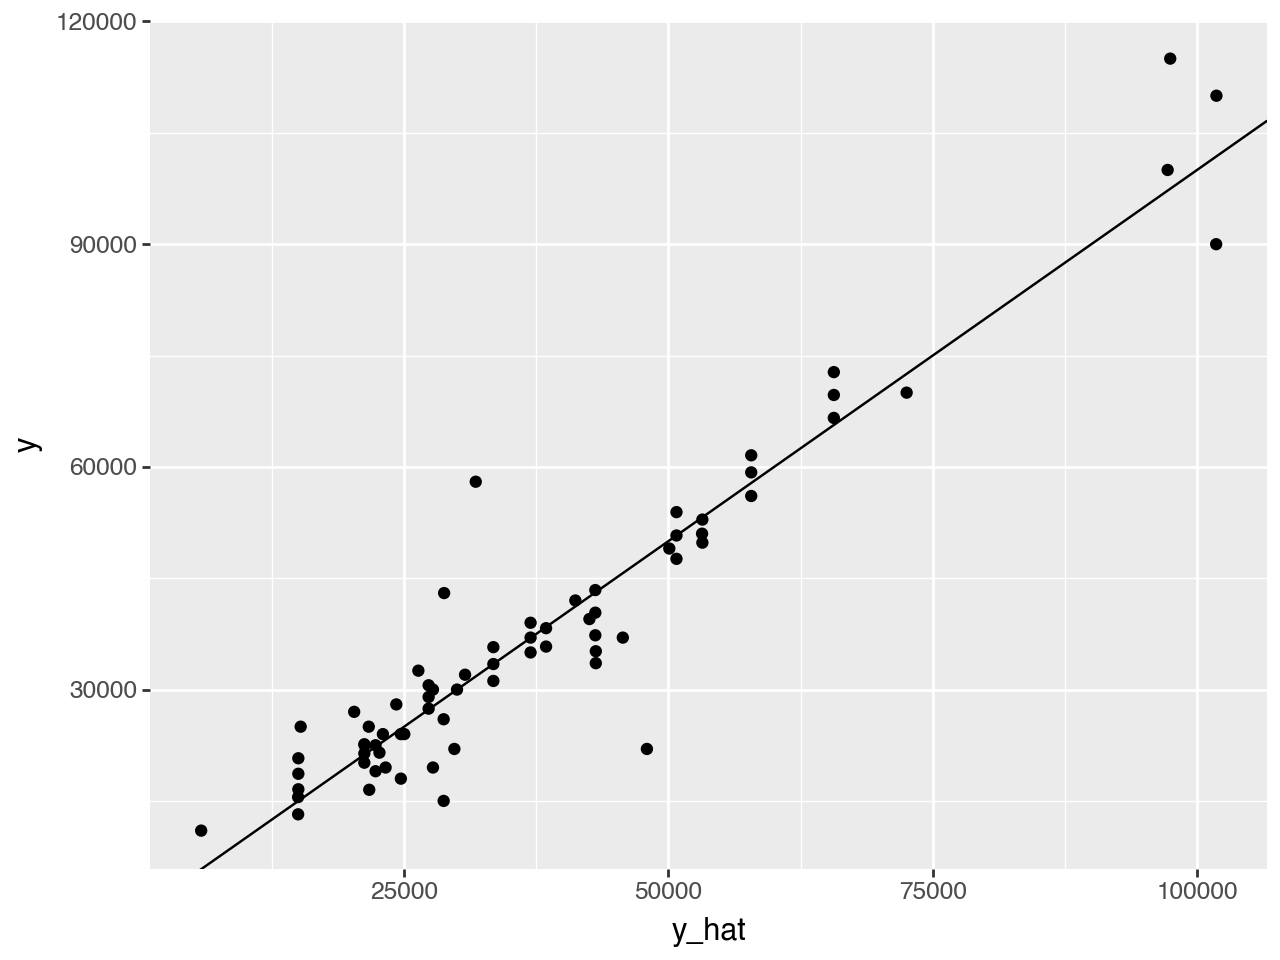

In [150]:
# Visualizing model prediction on train data
df_plot = pd.DataFrame({'y': train_df.asking, 'y_hat': res.predict(train_df)})
ggplot(df_plot) + geom_point(aes('y_hat', 'y')) + geom_abline()

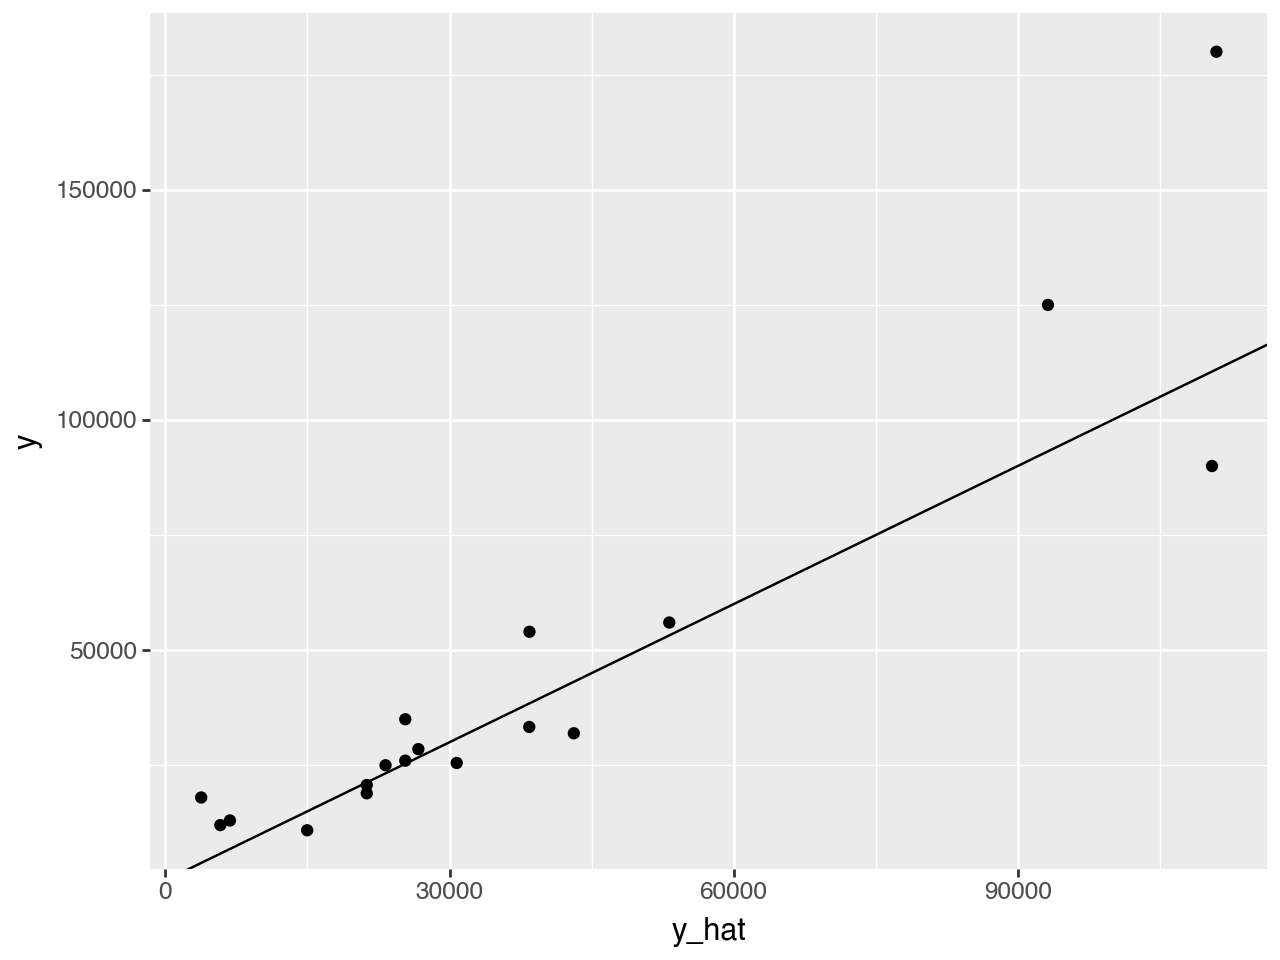

In [152]:
# Visualizing model prediction on test data
df_plot = pd.DataFrame({'y': test_df.asking, 'y_hat': res.predict(test_df)})
ggplot(df_plot) + geom_point(aes('y_hat', 'y')) + geom_abline()

In [153]:
# Checking that the model is calibrated on test data
mod_calibration = smf.ols(formula='y ~ y_hat', data=df_plot)
res_calibration = mod_calibration.fit()
print(res_calibration.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     85.76
Date:                Sun, 06 Apr 2025   Prob (F-statistic):           7.91e-08
Time:                        23:32:47   Log-Likelihood:                -201.11
No. Observations:                  18   AIC:                             406.2
Df Residuals:                      16   BIC:                             408.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2755.7763   6688.935     -0.412      0.6

/Users/dominiqueperrault-jonc/miniconda3/envs/bruno/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.


# Prediction

In [154]:
# Retrain selected model on all available data for prediction
mod = smf.ols(formula='asking ~ truck_model + truck_mileage + truck_year + trim + cab + camper_model + camper_flatbed + camper_year', data=df_data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 asking   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     26.33
Date:                Sun, 06 Apr 2025   Prob (F-statistic):           1.58e-24
Time:                        23:38:27   Log-Likelihood:                -937.88
No. Observations:                  89   AIC:                             1920.
Df Residuals:                      67   BIC:                             1975.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

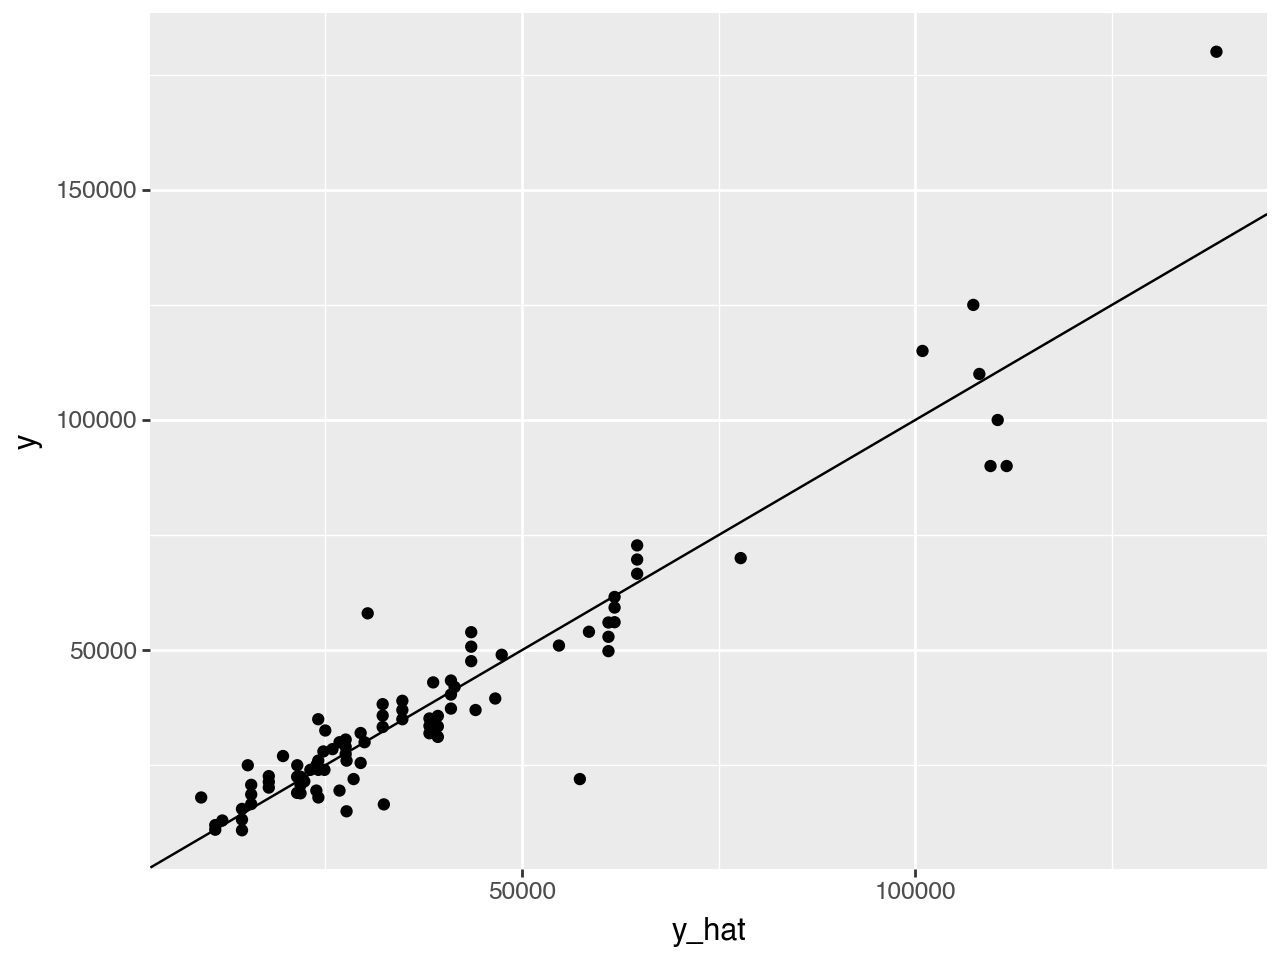

In [155]:
# Visualizing model prediction on train data
df_plot = pd.DataFrame({'y': df_data.asking, 'y_hat': res.predict(df_data)})
ggplot(df_plot) + geom_point(aes('y_hat', 'y')) + geom_abline()

In [115]:
# Truck mean value and confidence interval
# The "correct" confidence interval to use is [obs_ci_lower, obs_ci_upper]
# as we are predicting the value/asking price for a new observation/point
# not for the confidence interval for the mean value/asking price.
truck_value = res.get_prediction(df_truck)
truck_value.summary_frame(0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,139060.636806,6442.617408,126201.118637,151920.154975,114438.641441,163682.632172
